In [12]:
from SALib import ProblemSpec
from SALib.test_functions import Sobol_G
import numpy as np

import matplotlib.pyplot as plt

In [13]:
def sobol_g_param(n):
    names_arr = []
    a_ar=[]
    delta_ar=[]
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

        a_i = (i-1) / 2
        a_ar.append(a_i)

        delta_ar.append(0)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })
    return sp, a_ar, delta_ar

sp_4, a_arr_4, delta_arr_4 = sobol_g_param(4)
sp_40, a_arr_40, delta_arr_40 = sobol_g_param(40)
sp_400, a_arr_400, delta_arr_400 = sobol_g_param(400)

# Sobol Indices

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	6144 samples
Outputs:
	1 outputs: ['Y']
	6144 evaluations
Analysis:
          ST   ST_conf
x0  0.775863  0.100001
x1  0.349943  0.069584
x2  0.174384  0.031824
x3  0.101933  0.016489
          S1   S1_conf
x0  0.489255  0.062537
x1  0.089268  0.057427
x2  0.043858  0.035803
x3  0.030341  0.031645



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.775561  0.172670
x1   0.331291  0.062908
x2   0.159103  0.034460
x3   0.100185  0.033191
x4   0.063198  0.016877
x5   0.039669  0.007142
x6   0.029815  0.006585
x7   0.024564  0.007272
x8   0.020796  0.007877
x9   0.016510  0.005578
x10  0.014899  0.003273
x11  0.011548  0.002793
x12  0.010811  0.003205
x13  0.010694  0.003242
x14  0.008014  0.002285
x15  0.006286  0.001386
x16  0.005936  0.001856
x17  0.005620  0.001729
x18  0.004353  0.001047
x19  0.004053  0.001075
x20  0.003209  0.000707
x21  0.002976  0.000749
x22  0.003609  0.000916
x23  0.002860  0.000752
x24  0.003213  0.000979
x25  0.00

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


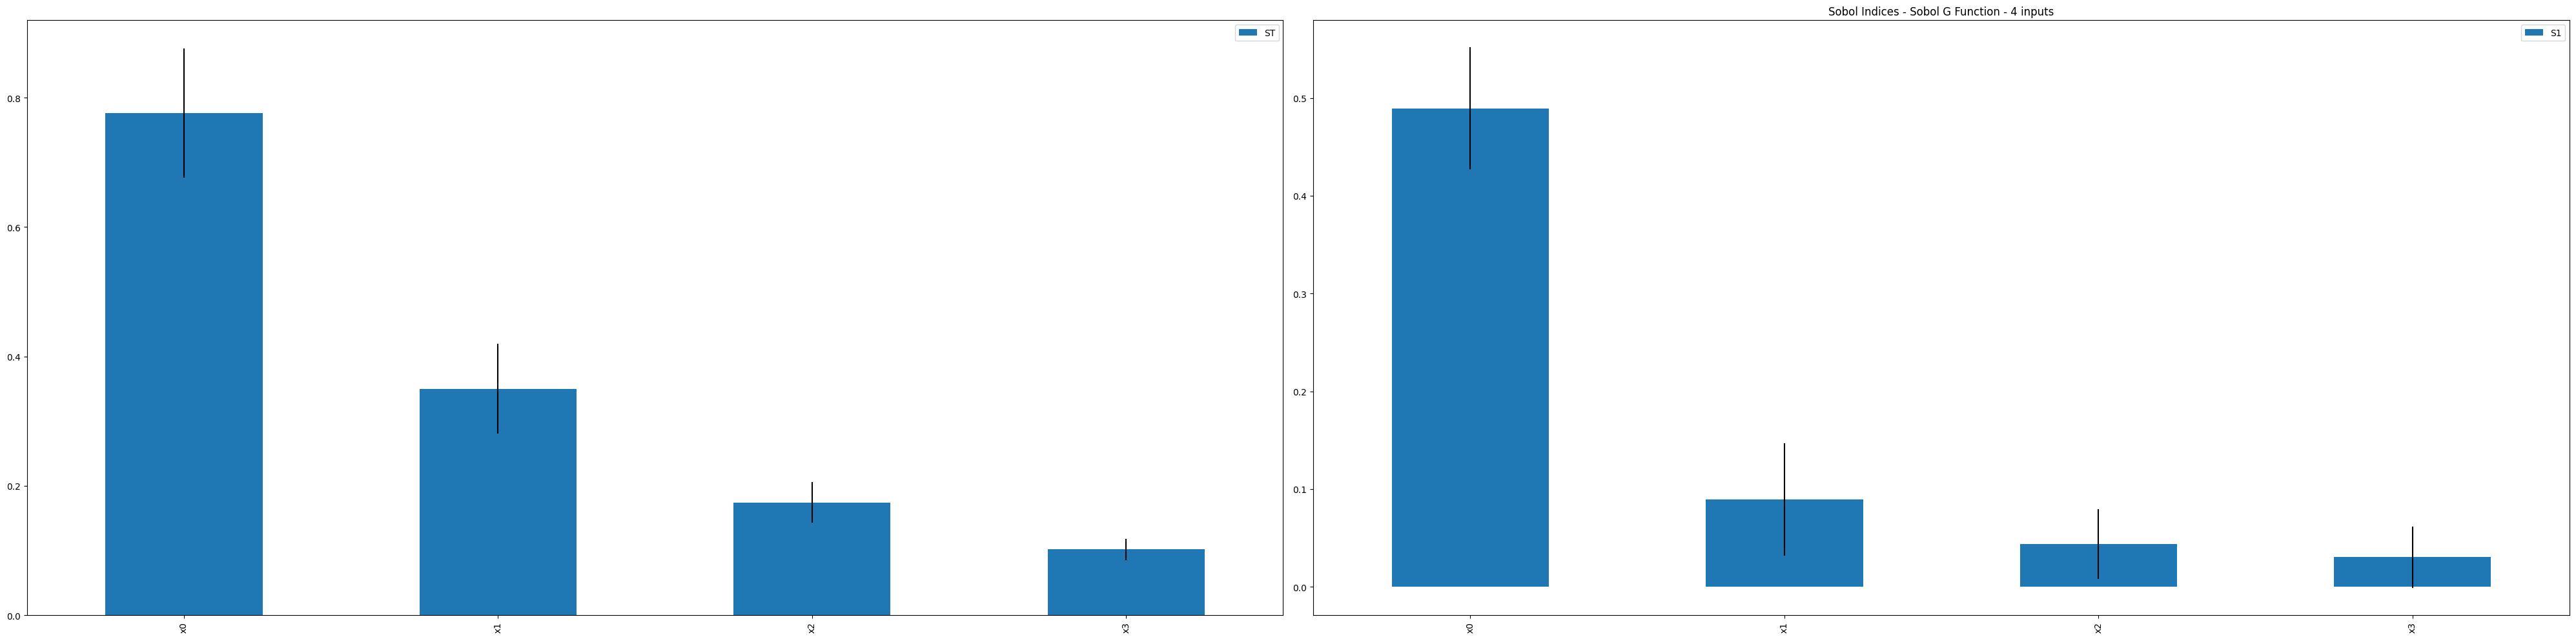

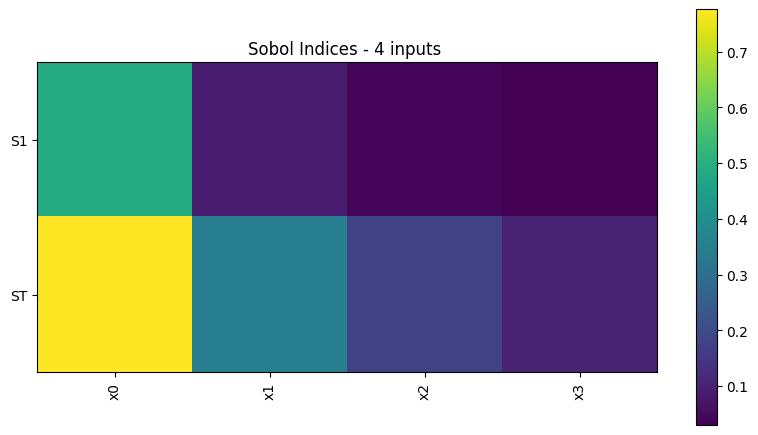

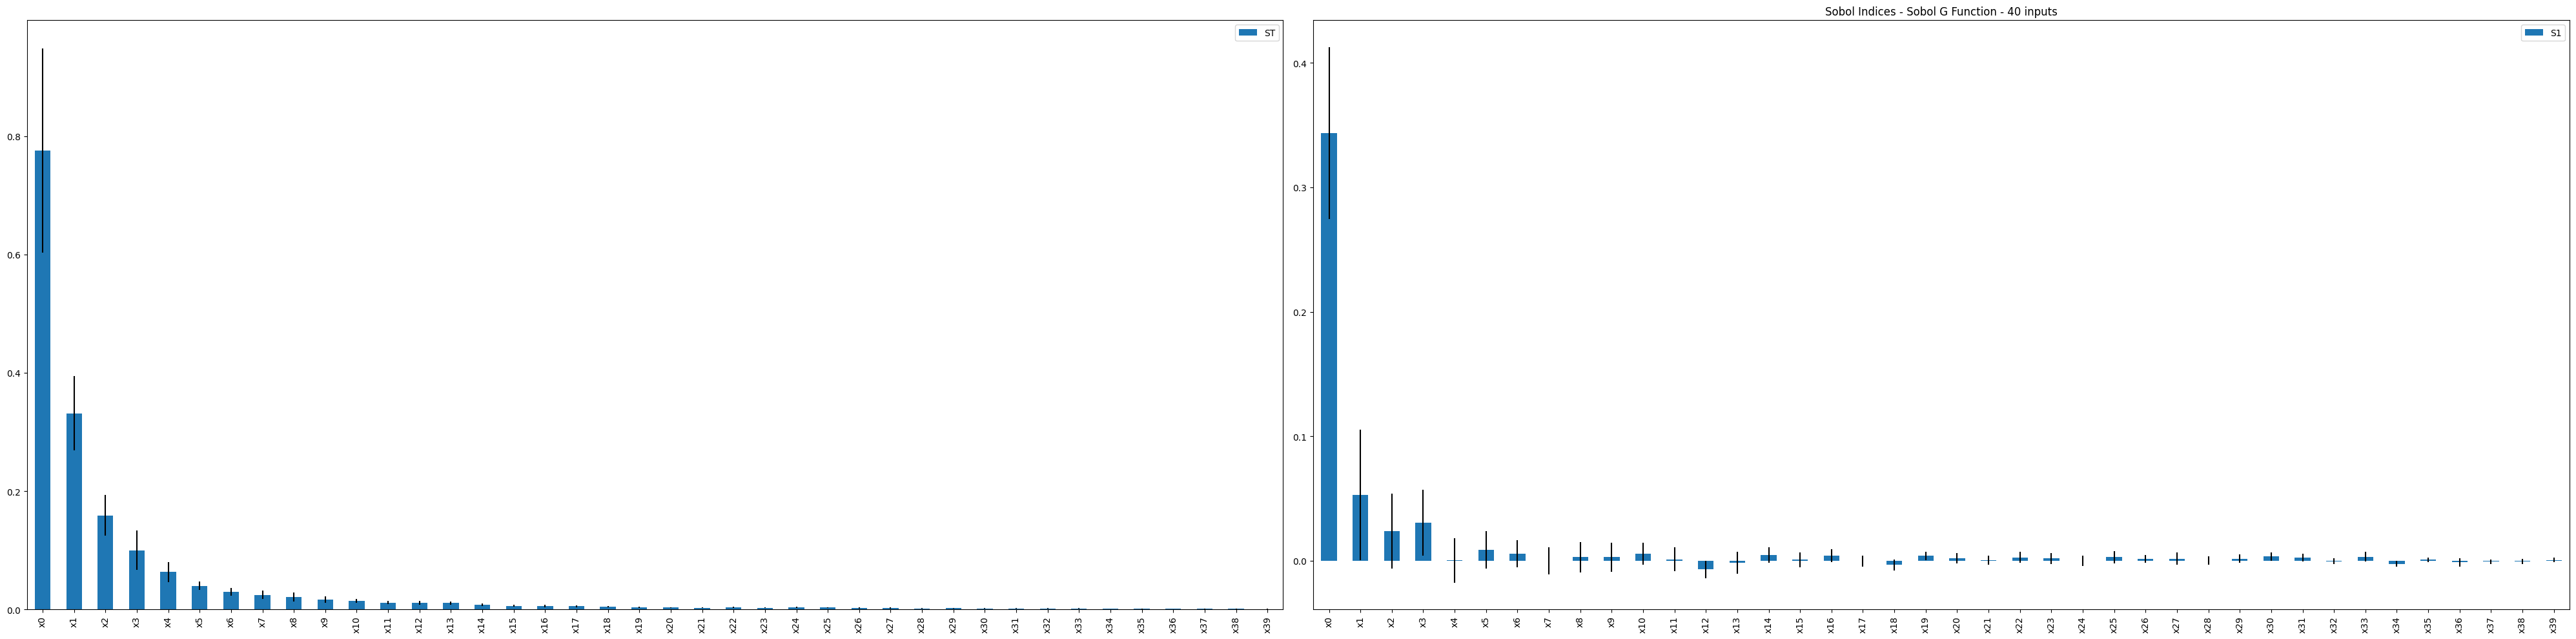

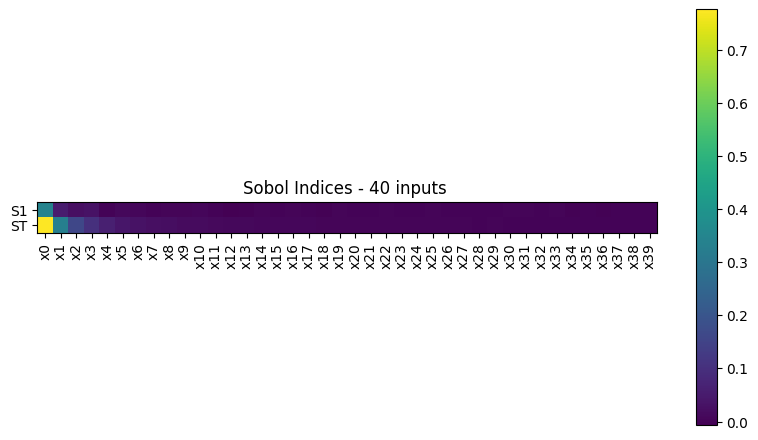

In [16]:
%%time
# ==== Sobol Indices ~ Sobol G-Function ===
def si_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_sobol(1024, calc_second_order=False).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_sobol(calc_second_order=False))
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    # axes[0].set_yscale('log') # set plot to log scale
    # axes[1].set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 10)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap(title=f"Sobol Indices - {n} inputs ")

si_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
si_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 26.5 s, sys: 636 ms, total: 27.2 s
Wall time: 29.1 s


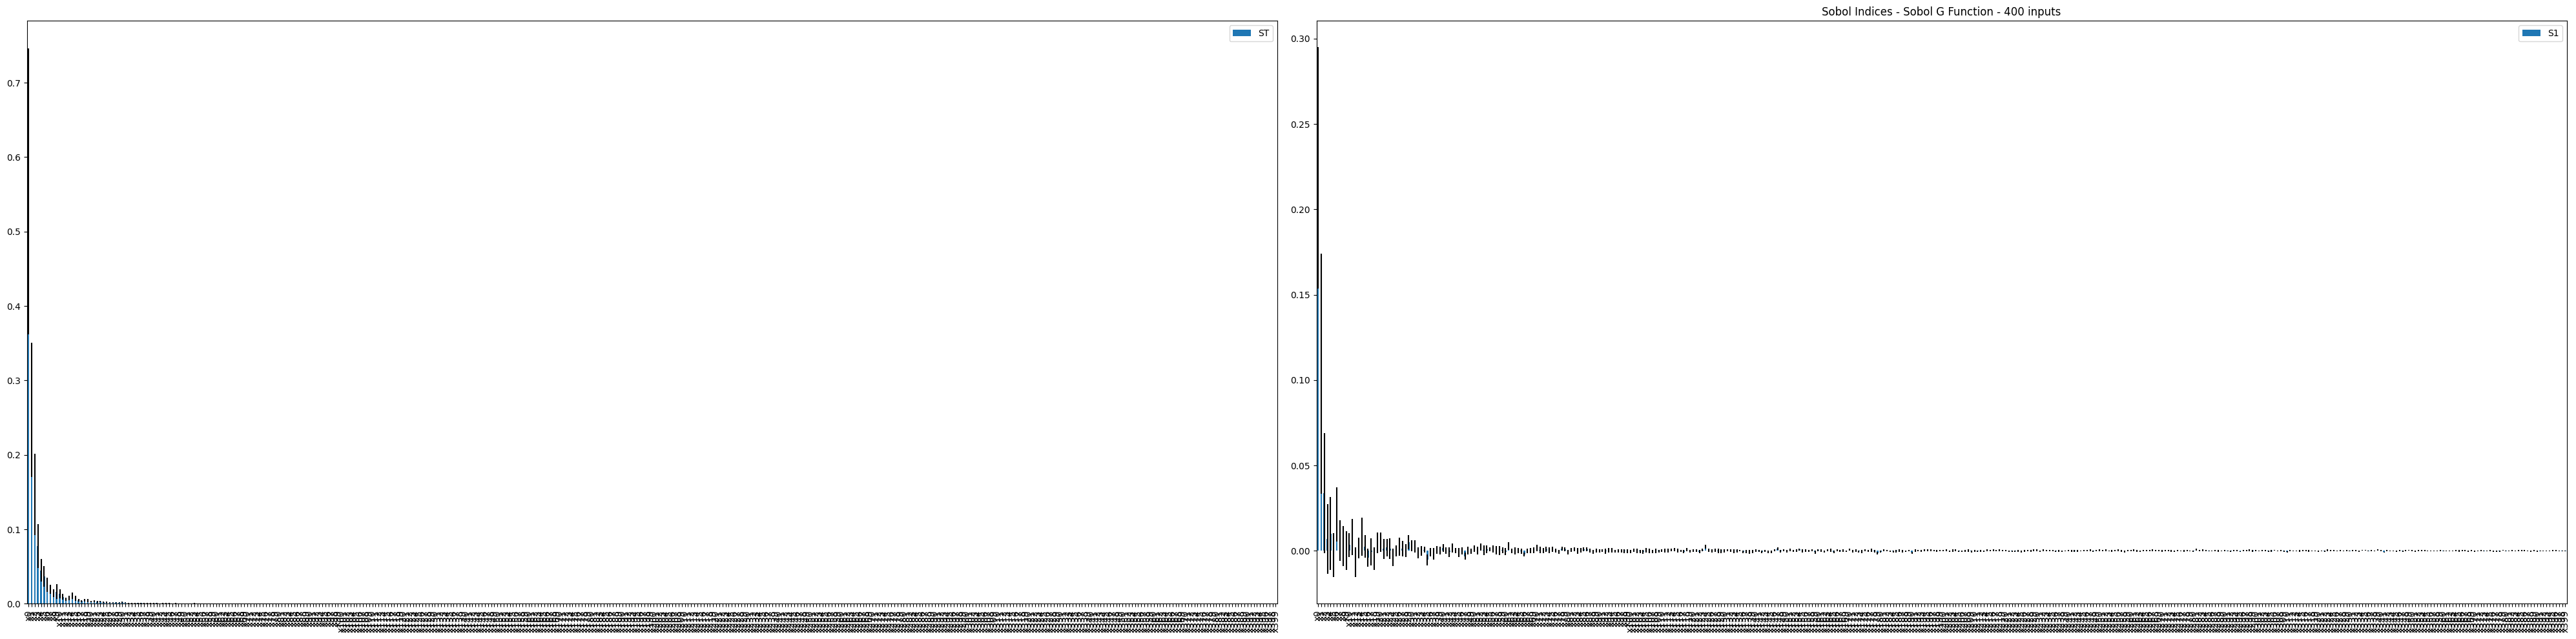

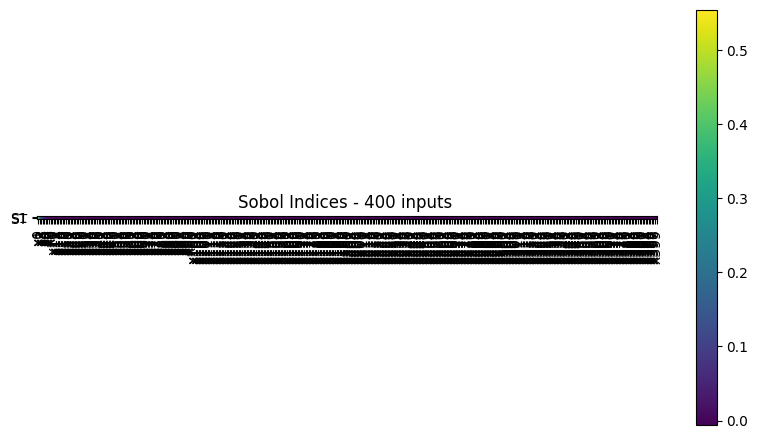

In [17]:
%%time
si_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# FAST

Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	4096 samples
Outputs:
	1 outputs: ['Y']
	4096 evaluations
Analysis:
          S1        ST   S1_conf   ST_conf
x0  0.434091  0.755227  0.015604  0.040957
x1  0.110958  0.338331  0.015198  0.043942
x2  0.046594  0.171086  0.013696  0.037750
x3  0.026451  0.109698  0.016175  0.042819

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	40960 samples
Outputs:
	1 outputs: ['Y']
	40960 evaluations
Analysis:
           S1        ST   S1_conf   ST_conf
x0   0.038594  0.533411  0.013797  0.037634
x1   0.166259  0.368630  0.016428  0.046594
x2   0.015183  0.175213  0.013900  0.034574
x3   0.003814  0.212478  0.011614  0.030777
x4   0.001788  0.077592  0.016995  0.038903
x5   0.002718  0.045627  0.015621  

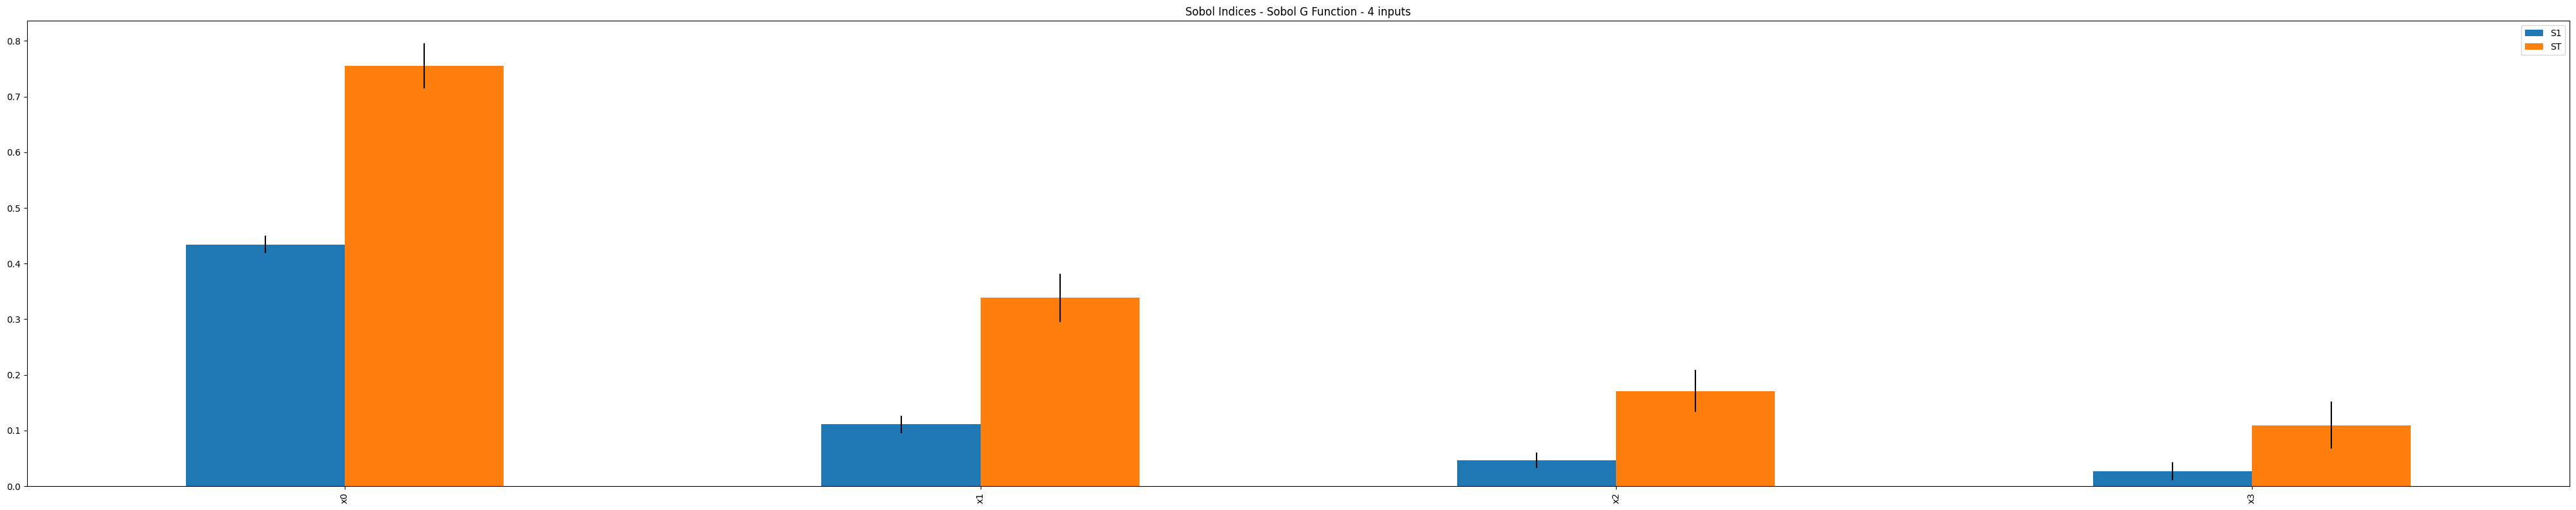

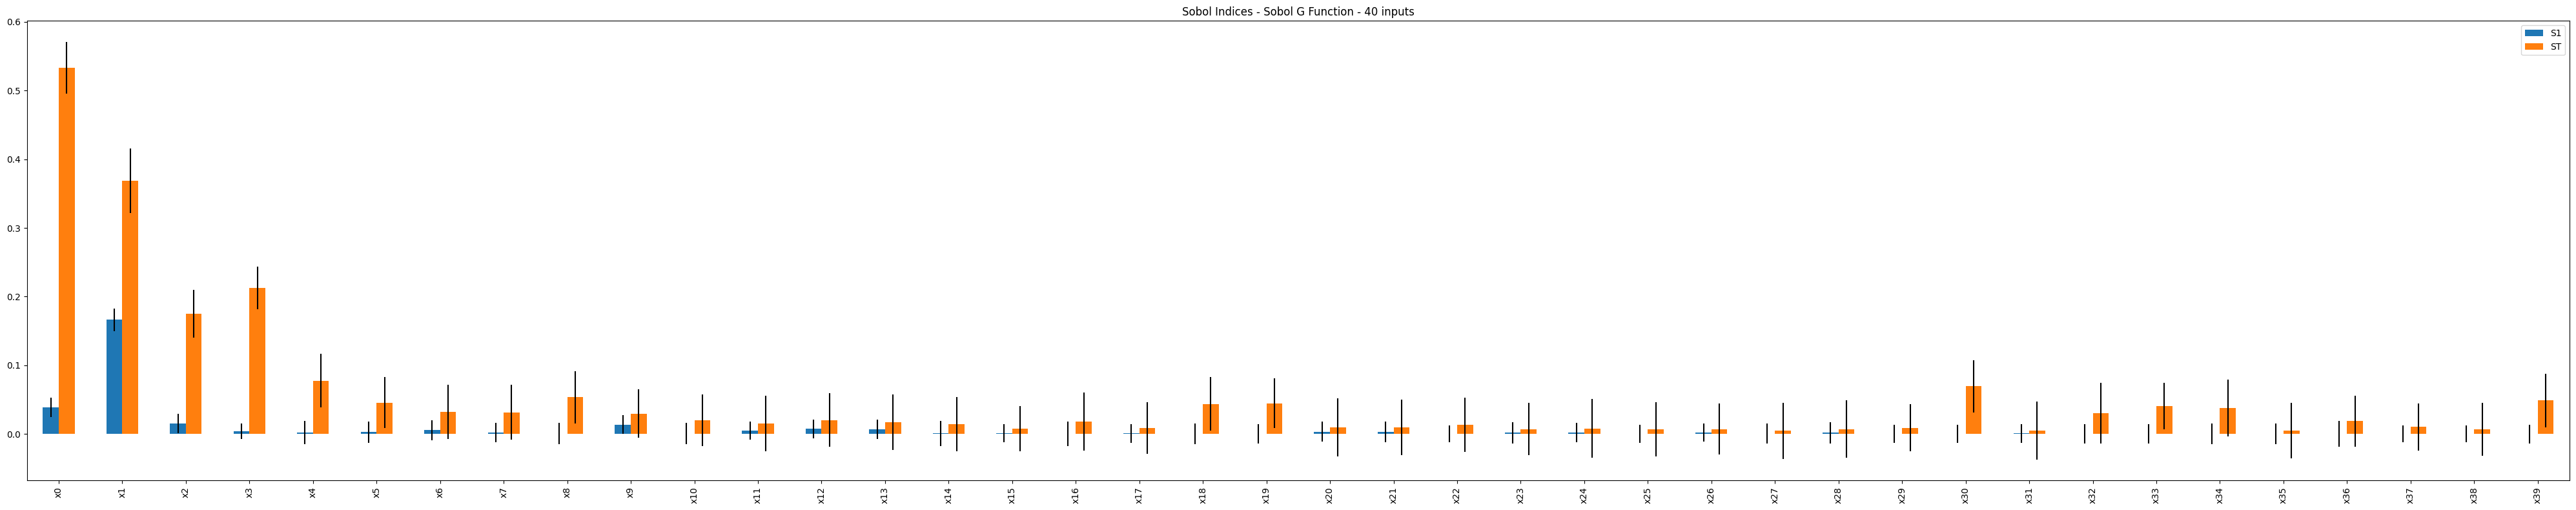

In [6]:
%%timeit
# ==== FAST ~ Sobol G-Function ===
def fast_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_fast(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_fast())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()

fast_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
fast_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

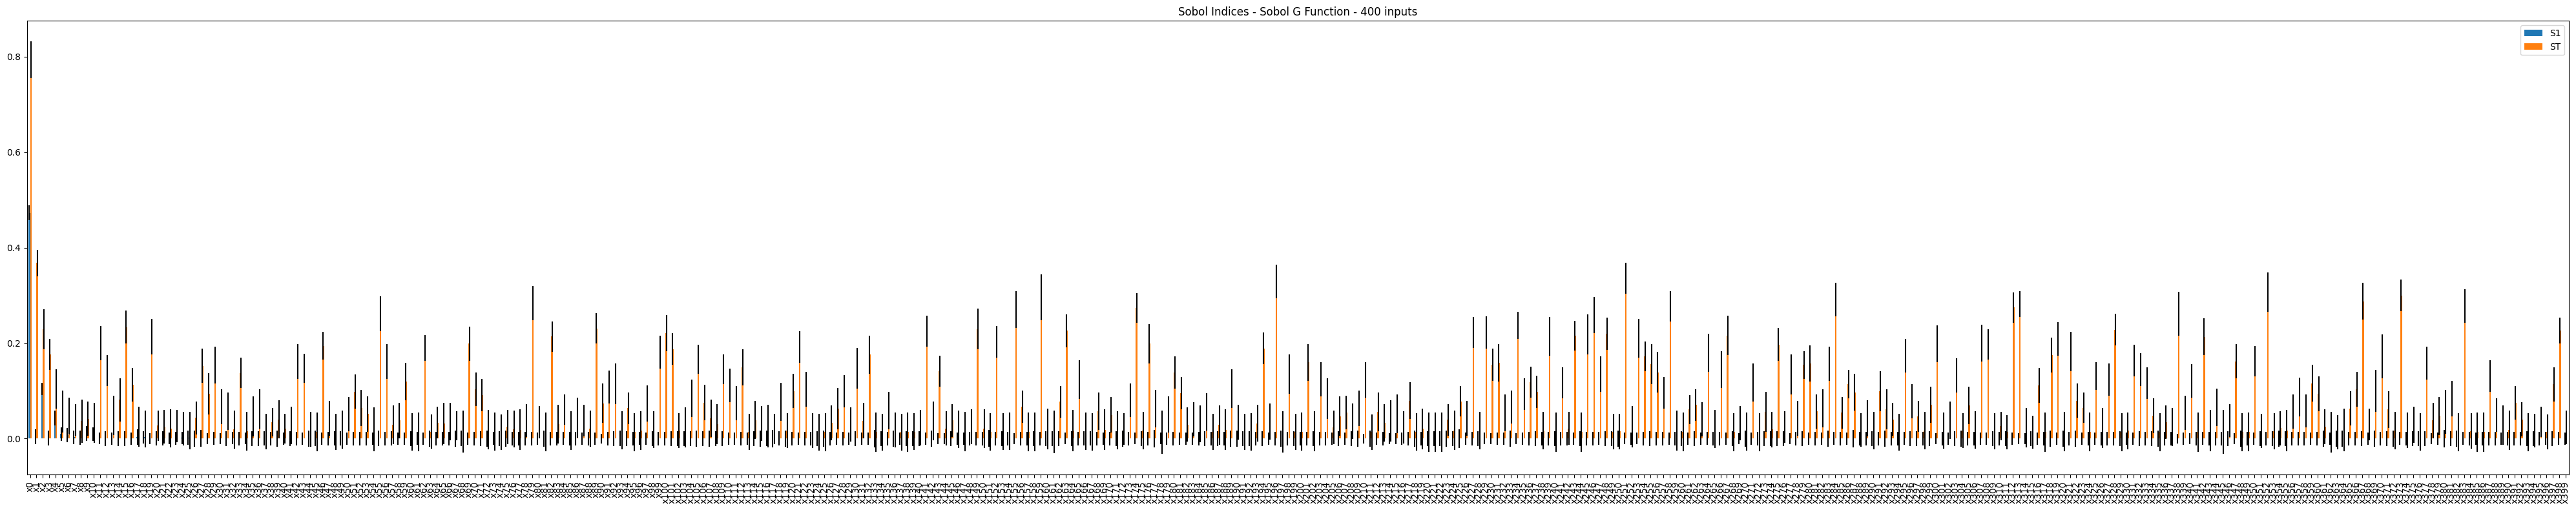

In [18]:
%%time
fast_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# RBD-FAST

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
          S1   S1_conf
x0  0.445151  0.055214
x1  0.118495  0.066036
x2  0.036730  0.036513
x3  0.034453  0.043457

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
           S1   S1_conf
x0   0.344127  0.093128
x1   0.092016  0.044284
x2   0.019839  0.038261
x3   0.027178  0.042752
x4   0.013363  0.032906
x5   0.003685  0.041520
x6  -0.000358  0.029199
x7   0.001567  0.020804
x8   0.006751  0.025959
x9  -0.000721  0.024153
x10  0.002586  0.033195
x11  0.010110  0.032225
x12 -0.005163  0.022897
x13  0.006752  0.032666
x14 -0.000526  0.025612
x15  0.000439  0.

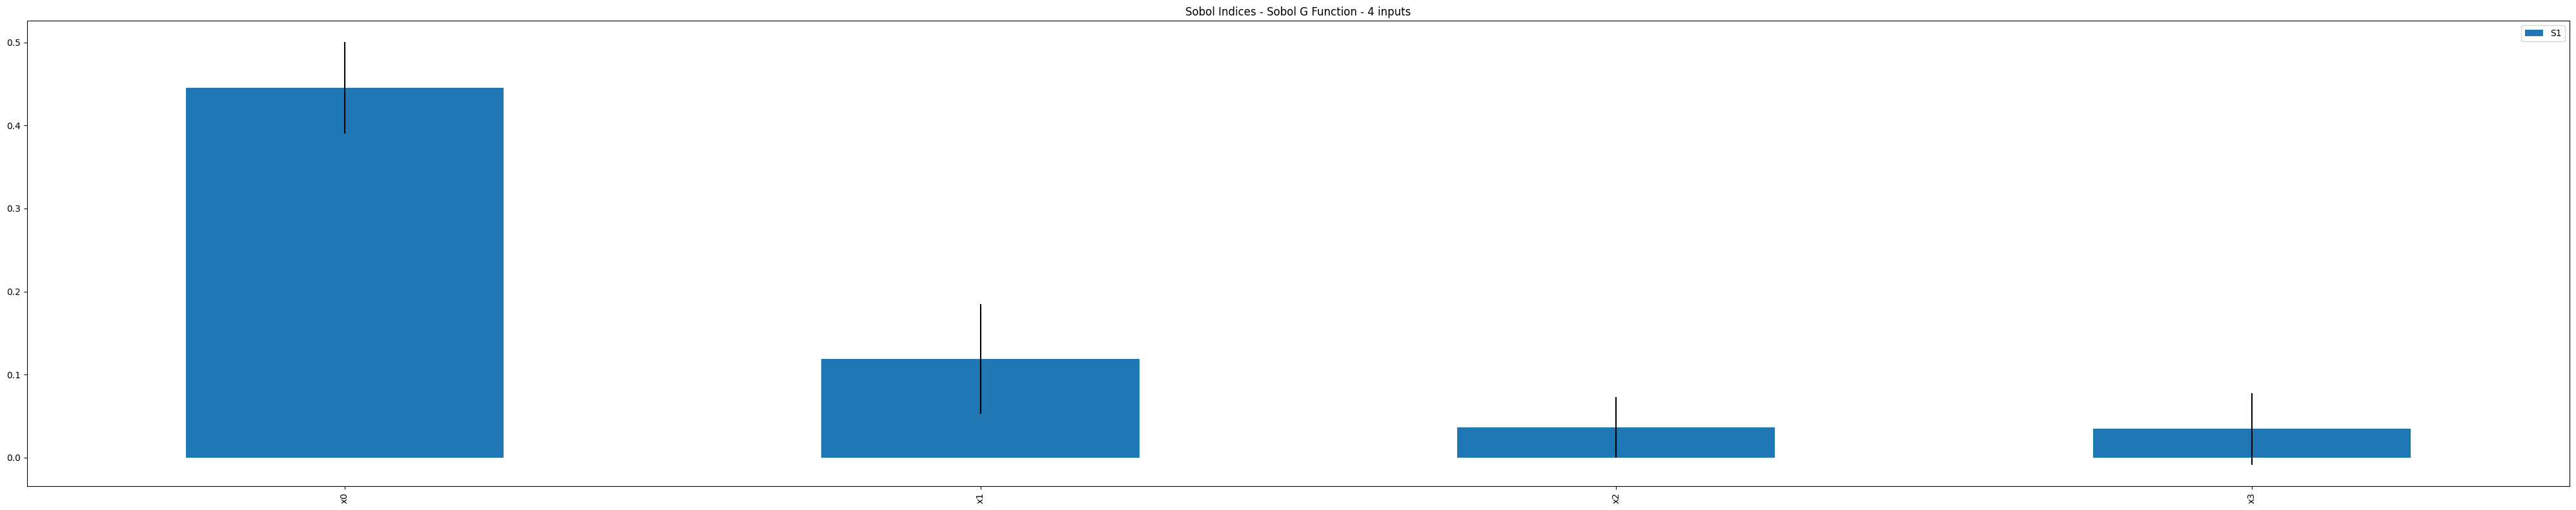

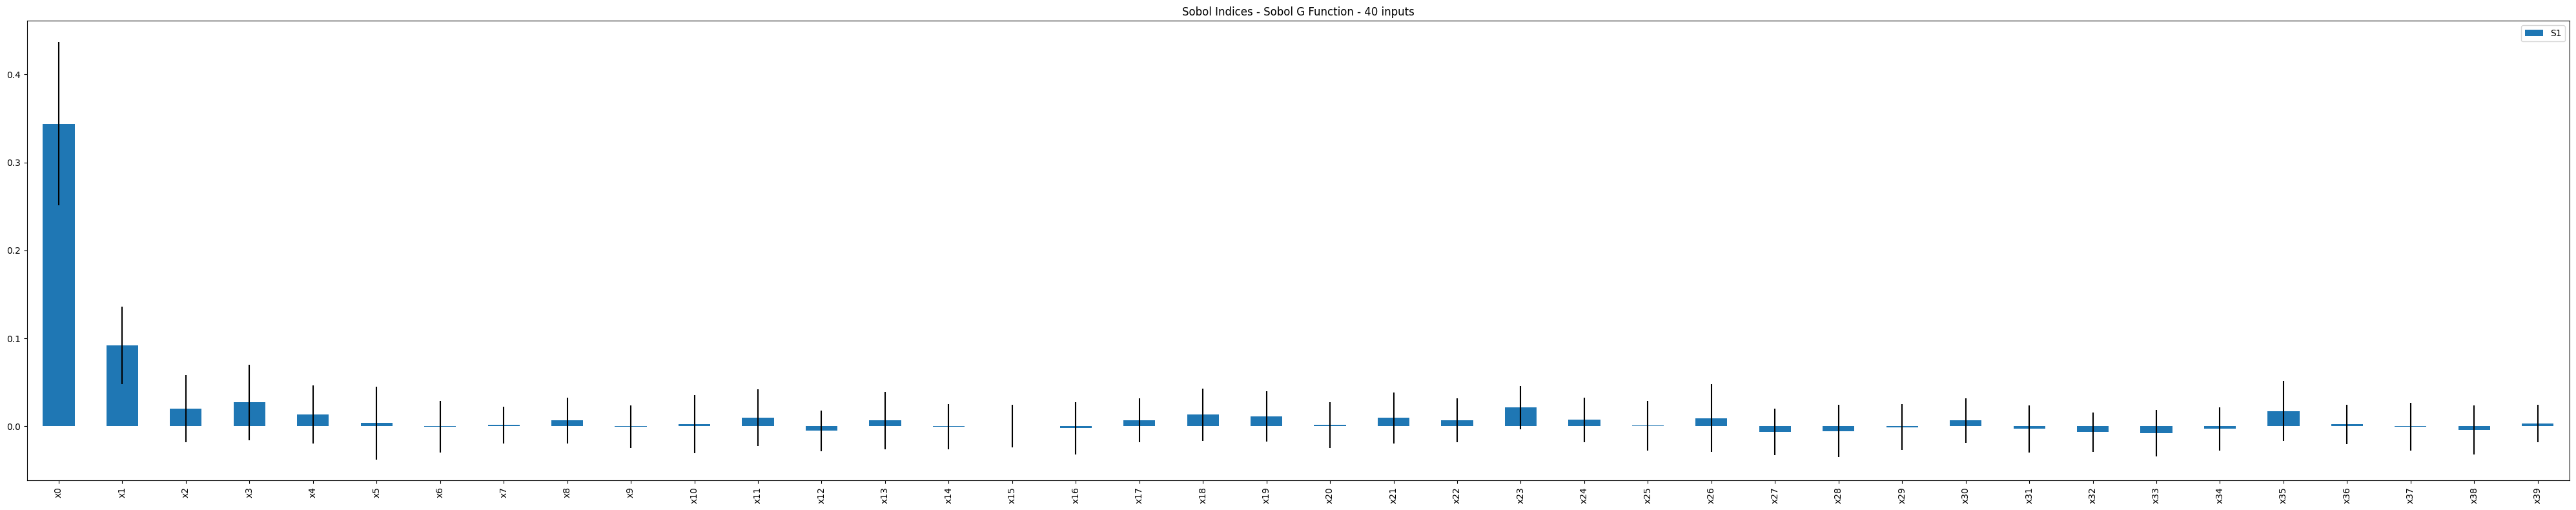

In [7]:
%%time
# ==== RBD-FAST ~ Sobol G-Function ===
def rbd_fast_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rbd_fast())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()

rbd_fast_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
rbd_fast_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

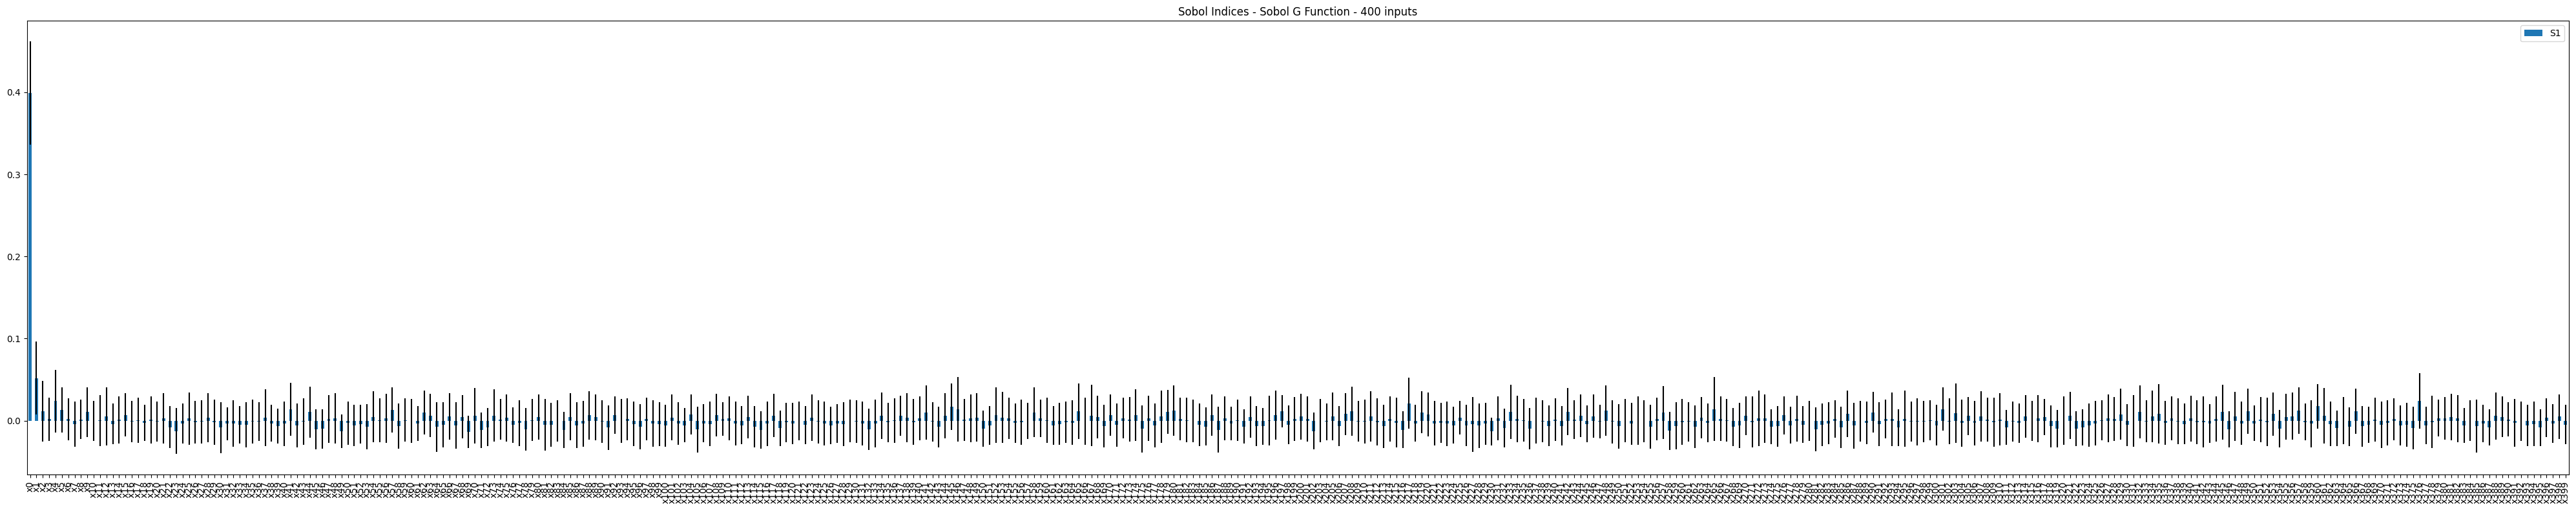

In [19]:
%%time
rbd_fast_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# Delta Moment-Independence

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
       delta  delta_conf        S1   S1_conf
x0  0.348233    0.026291  0.418202  0.037482
x1  0.225529    0.025298  0.093804  0.035234
x2  0.133353    0.023913  0.034235  0.020418
x3  0.096261    0.019610  0.030668  0.017806



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
        delta  delta_conf        S1   S1_conf
x0   0.352295    0.024567  0.292296  0.035689
x1   0.267463    0.022022  0.056537  0.026501
x2   0.176350    0.022690  0.045679  0.019348
x3   0.144350    0.021009  0.019835  0.017506
x4   0.138121    0.024073  0.032175  0.020942
x5   0.128711    0.021924  0.019881  0.014874
x6   0.131747    0.024072  0.044159  0.021747
x7   0.087092    0.022087  0.012325  0.014584
x8   0.117739    0.021014  0.029092  0.019590
x9   0.103576    0.019643  0.008200  0.009489
x10  0.134260    0.016952  0.013753  0.008324
x11  0.092579    0.017450  0.006770  0.010034
x12  0.104068    0.013872  0.006003  

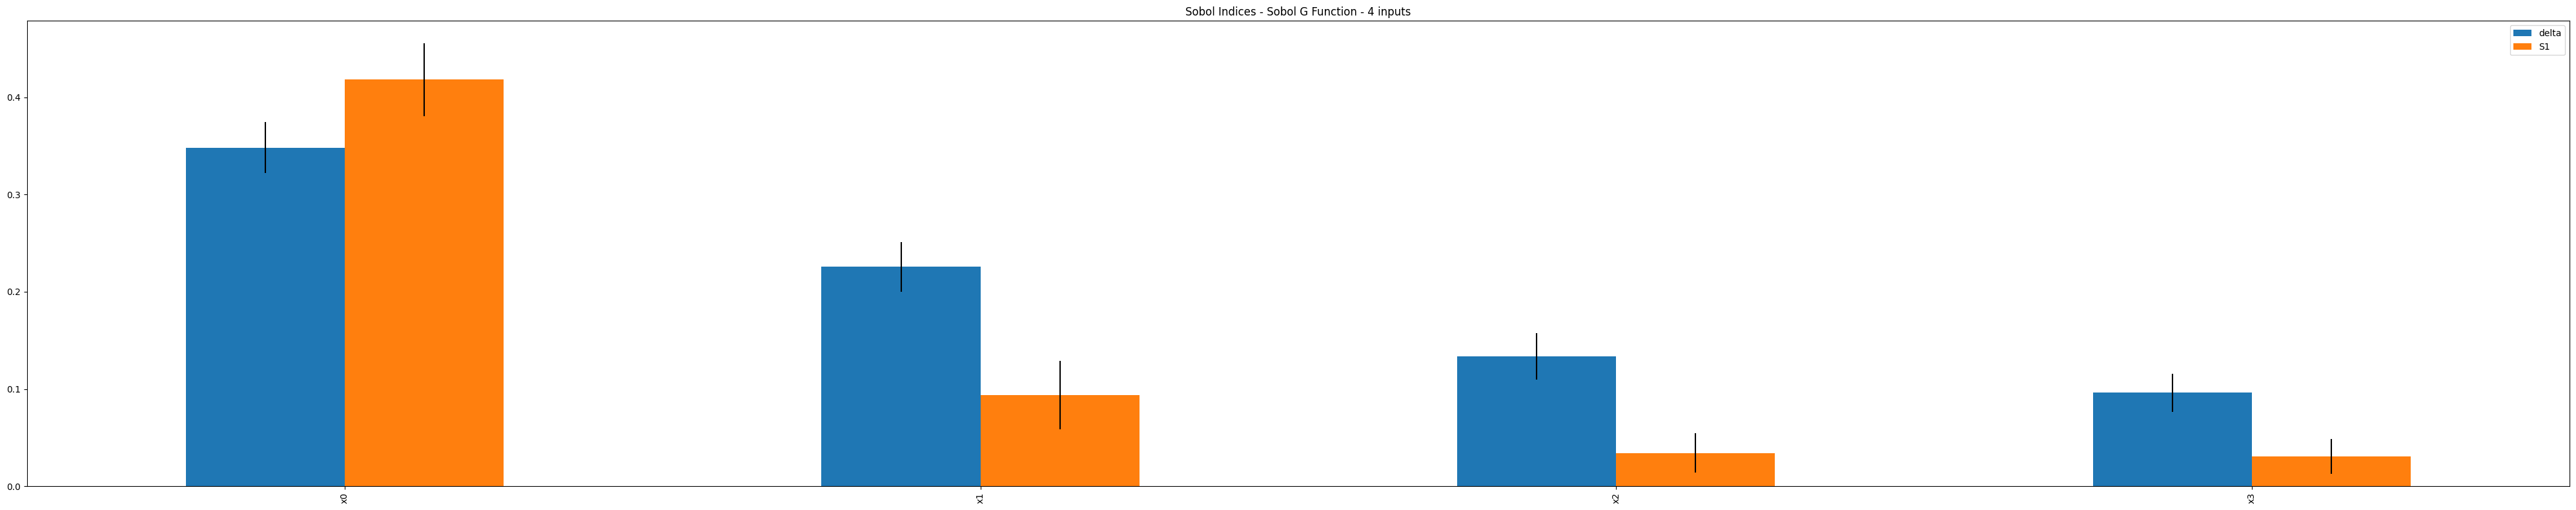

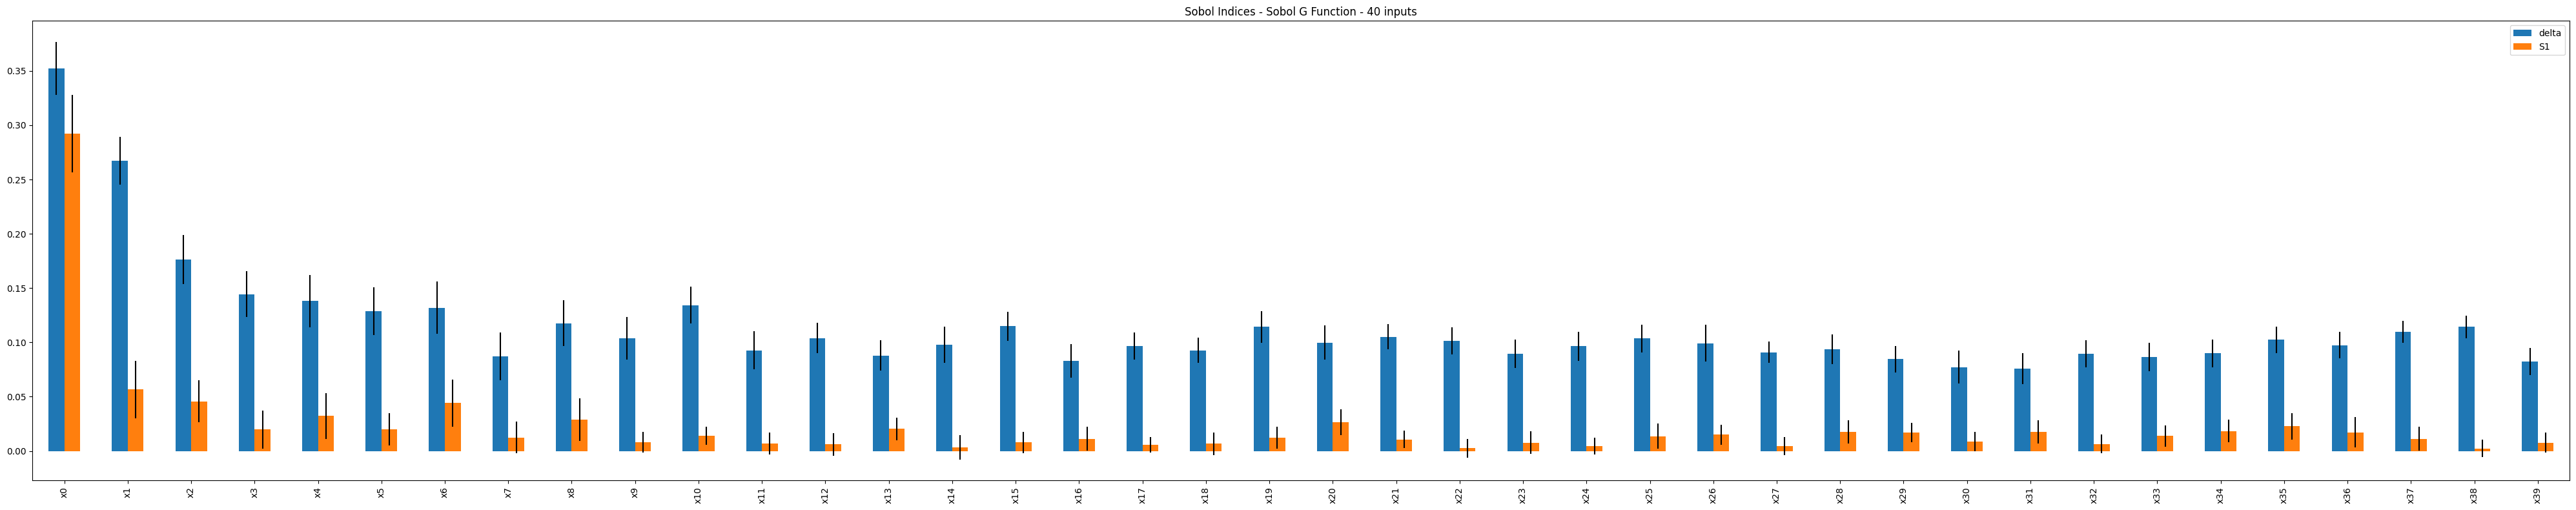

In [20]:
%%time
# ==== Delta ~ Sobol G-Function ===
def delta_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_delta())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()

delta_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
delta_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

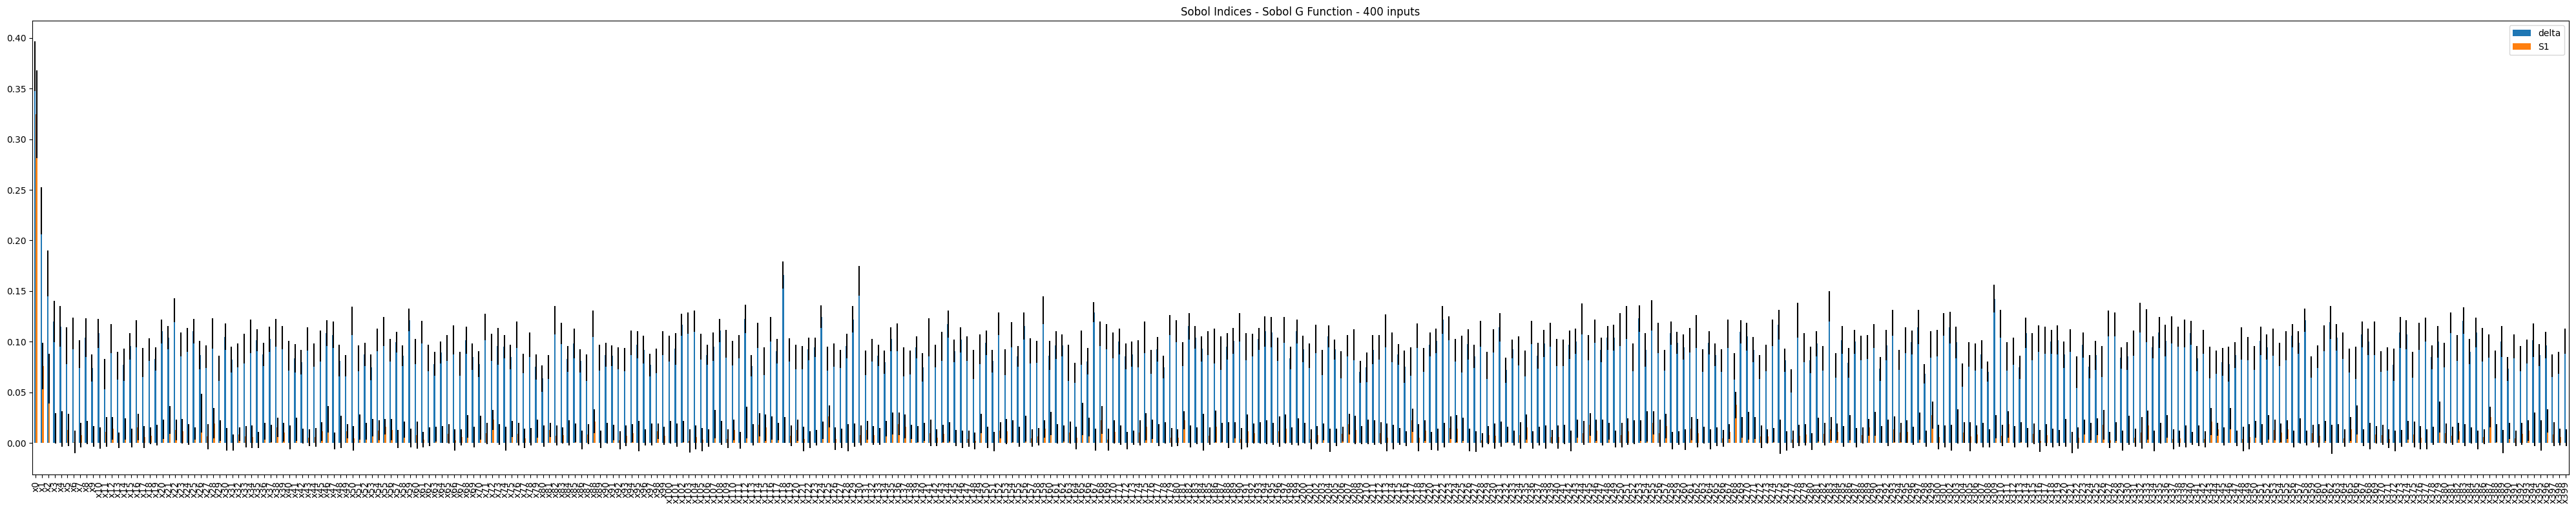

In [21]:
%%time
delta_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# PAWN

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is 

Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     minimum      mean    median   maximum        CV
x0  0.259766  0.427302  0.367537  0.756836  0.394368
x1  0.065564  0.215259  0.174355  0.407897  0.497304
x2  0.081016  0.144686  0.133990  0.284199  0.416518
x3  0.056239  0.119854  0.109517  0.204389  0.402468



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.282073  0.416944  0.330133  0.757812  0.416095
x1   0.112381  0.199125  0.178108  0.347158  0.404366
x2   0.041667  0.127653  0.125555  0.217084  0.424505
x3   0.042796  0.103953  0.099214  0.178845  0.335784
x4   0.071768  0.111623  0.086969  0.234566  0.450152
x5   0.065985  0.096686  0.092739  0.134405  0.264858
x6   0.050398  0.086703  0.080375  0.174444  0.361893
x7   0.066387  0.105200  0.090772  0.168313  0.319041
x8   0.053123  0.108686  0.094698  0.195619  0.441509
x9   0.044022  0.076287  0.068963  0.120960  0.290001
x10  0.062194  0.100512  0.088403  0.1761

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 1.05 s, sys: 362 ms, total: 1.42 s
Wall time: 1.07 s


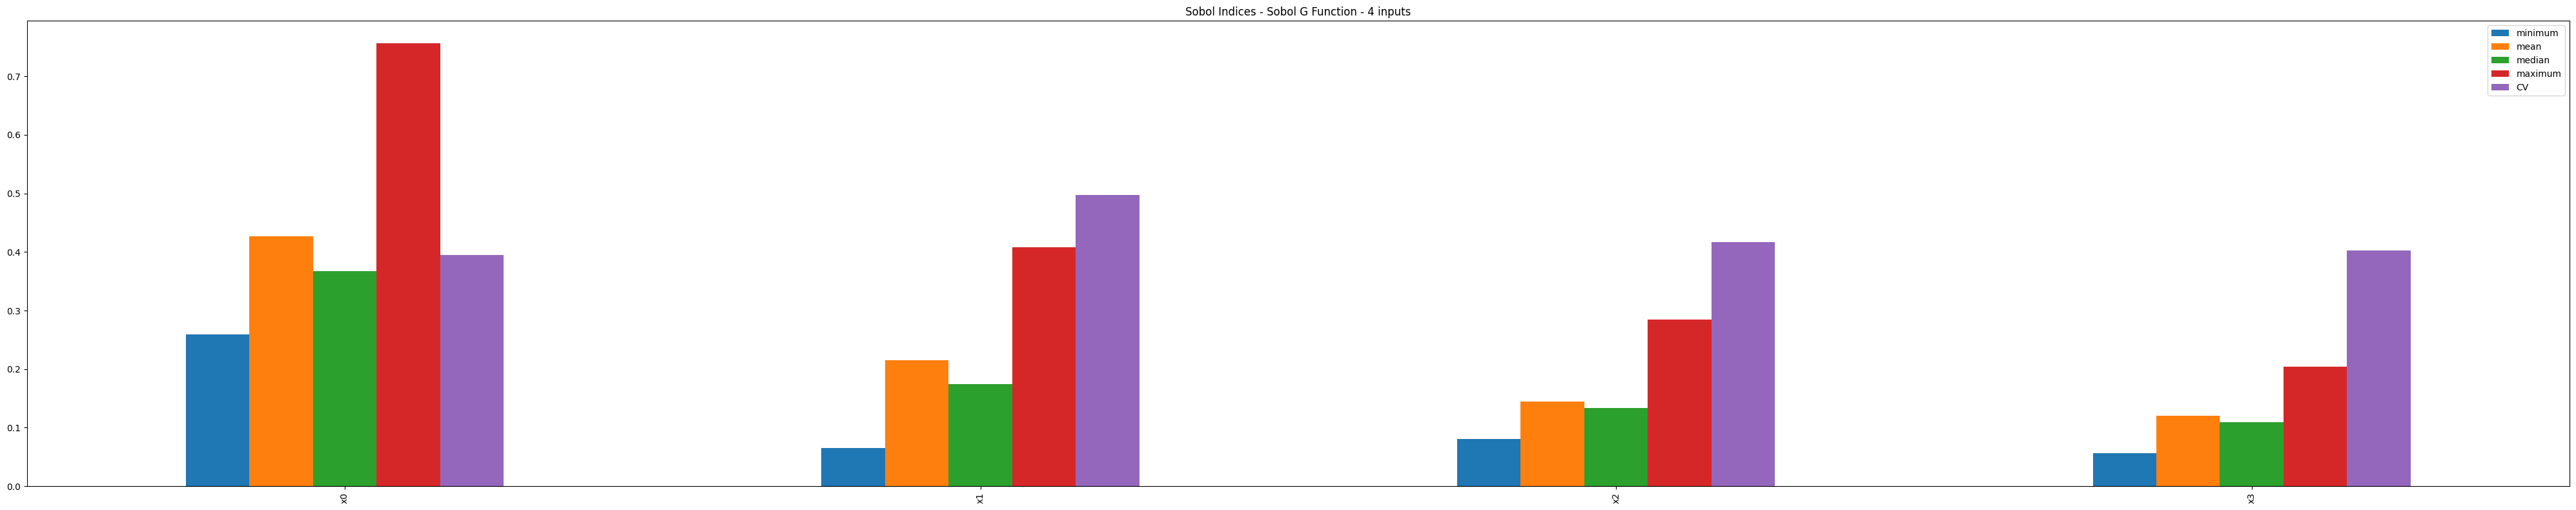

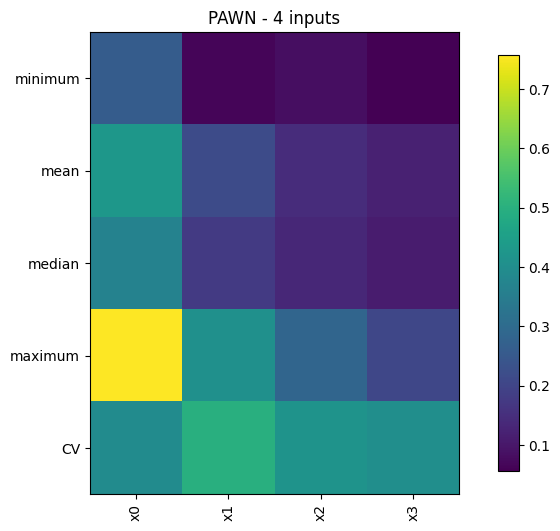

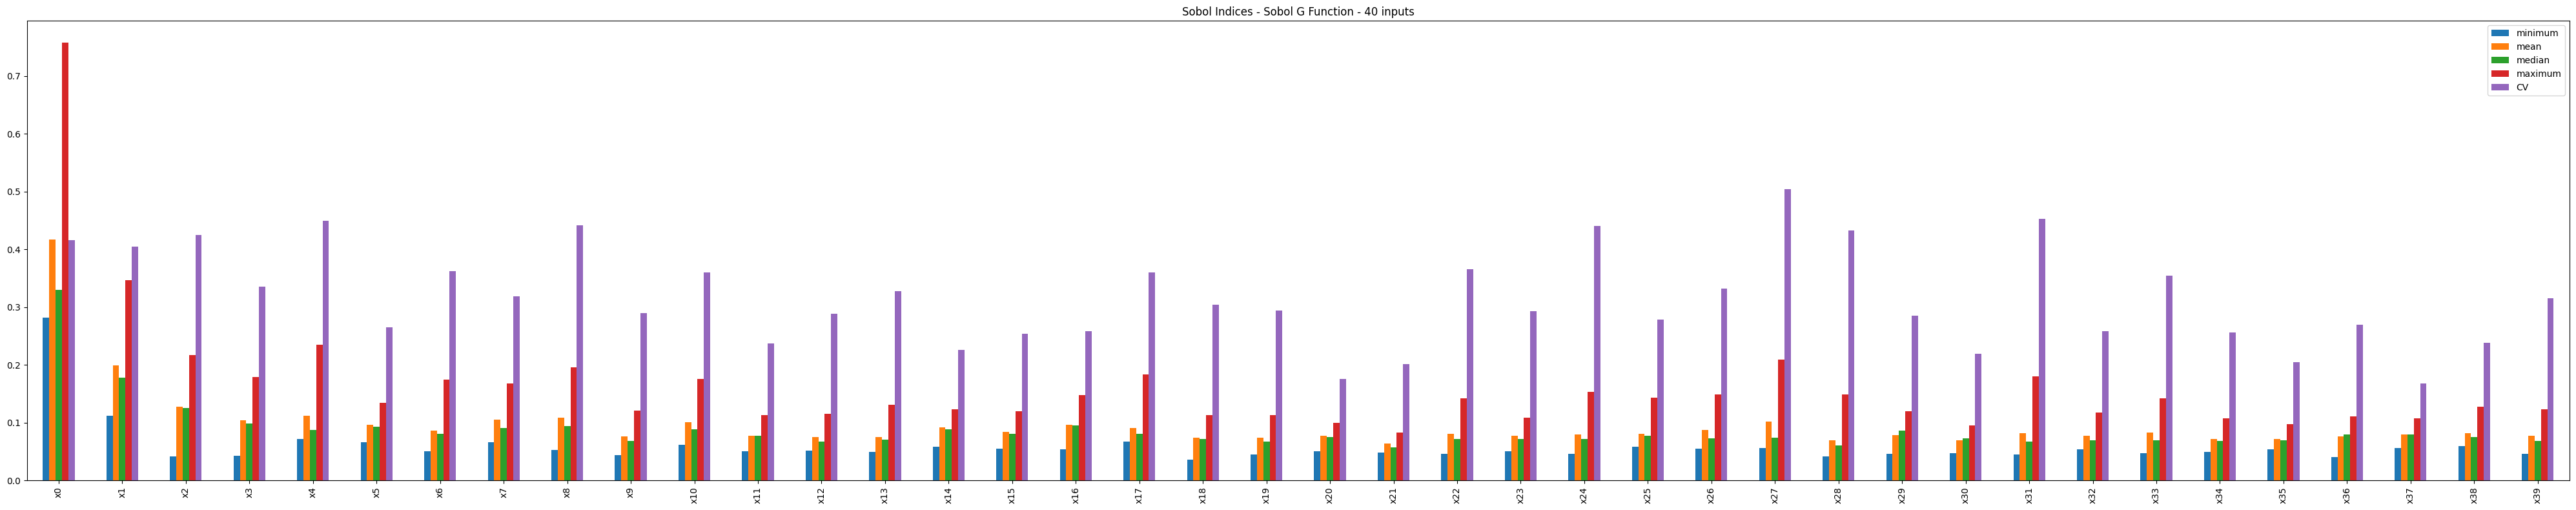

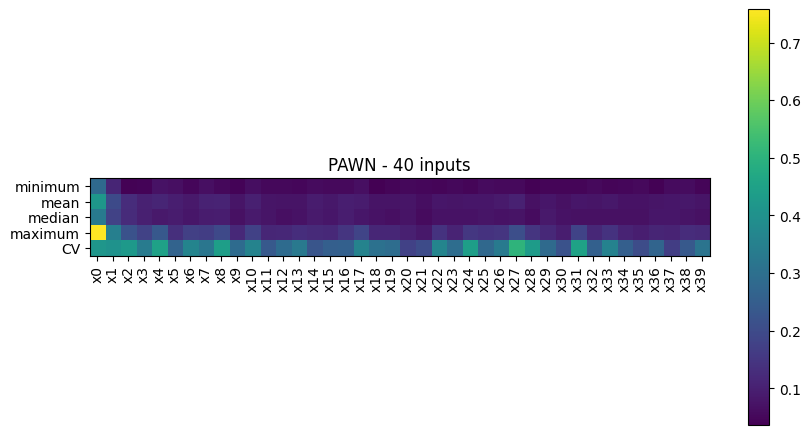

In [22]:
%%time
# ==== PAWN ~ Sobol G-Function ===
def pawn_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_pawn())   
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot()
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 8)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title=f"PAWN - {n} inputs")

pawn_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
pawn_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 4.49 s, sys: 251 ms, total: 4.74 s
Wall time: 4.84 s


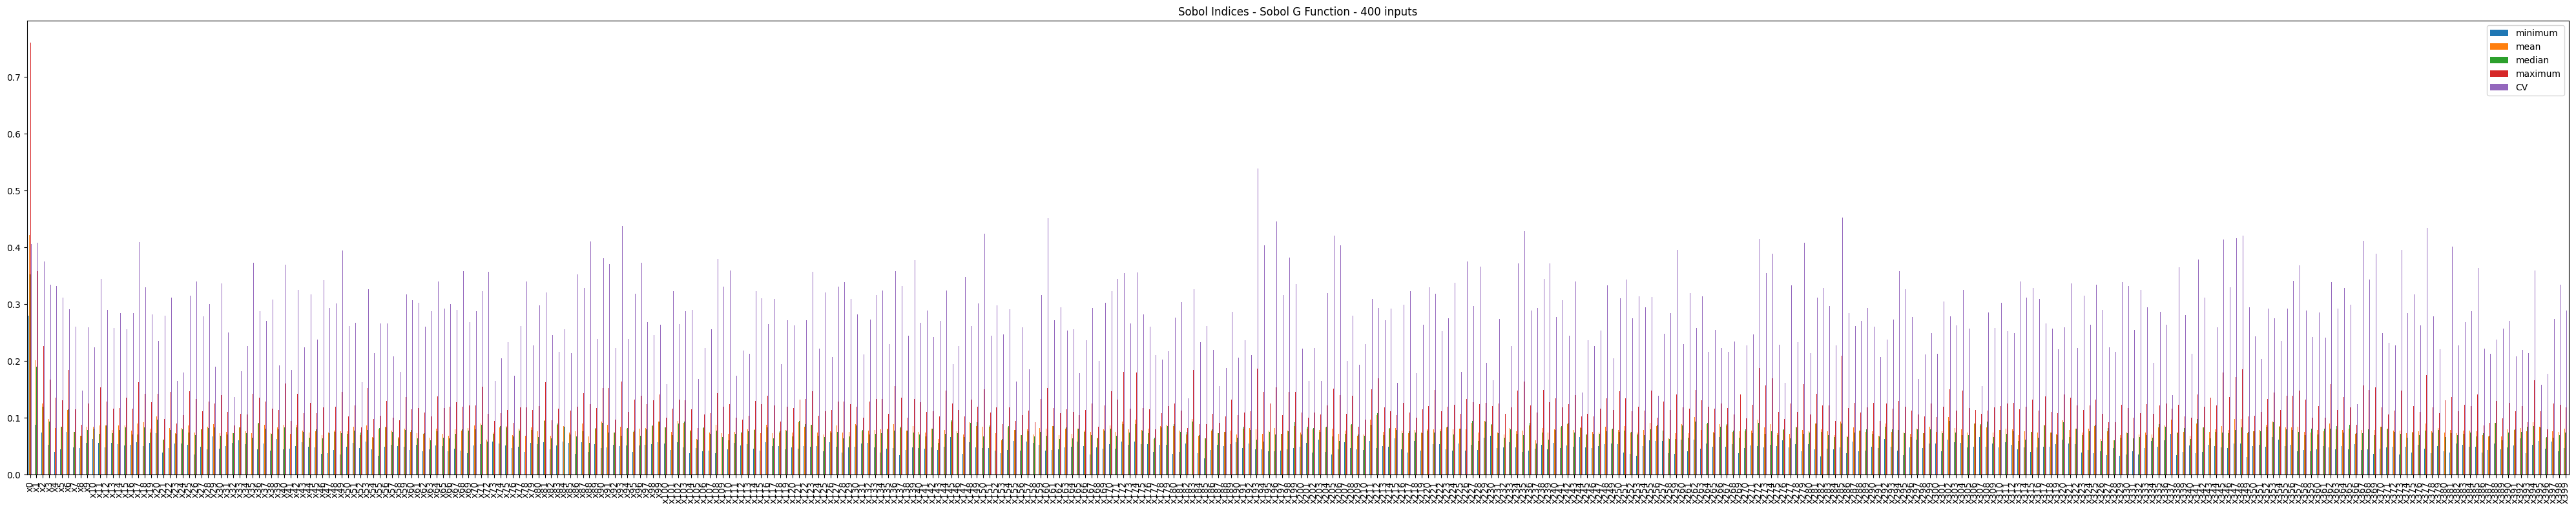

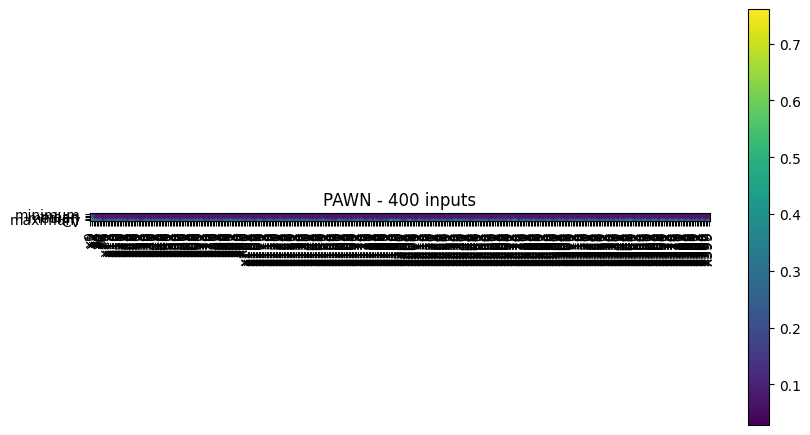

In [23]:
%%time
pawn_sobol_g(400, sp_400, a_arr_400, delta_arr_400)

# Method of Morris

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	5120 samples
Outputs:
	1 outputs: ['Y']
	5120 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x0  0.106578  7.793210  9.621856      0.375700
x1 -0.132065  4.535108  6.617668      0.320693
x2 -0.022377  3.287230  4.996713      0.206215
x3  0.435475  2.734230  4.172364      0.188863

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	41984 samples
Outputs:
	1 outputs: ['Y']
	41984 evaluations
Analysis:
           mu    mu_star      sigma  mu_star_conf
x0  -3.166852  30.387019  42.325931      1.776093
x1  -1.138054  19.043911  31.261629      1.460138
x2   0.054474  13.950576  24.098712      1.137874
x3  -0.975588  11.009000  19.416423      0.955061
x4   0.670521   9.267360  16.

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


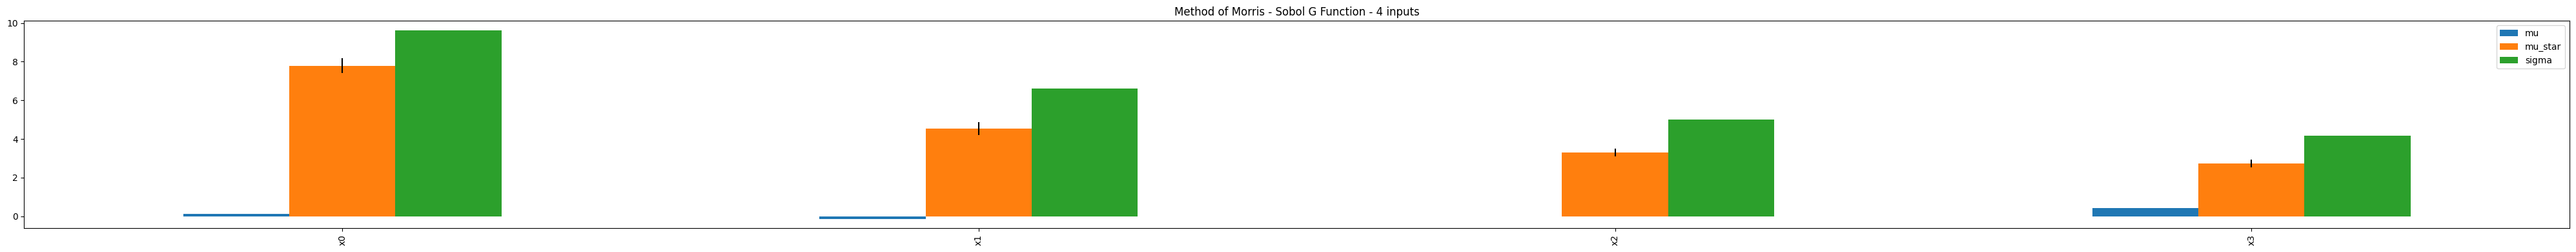

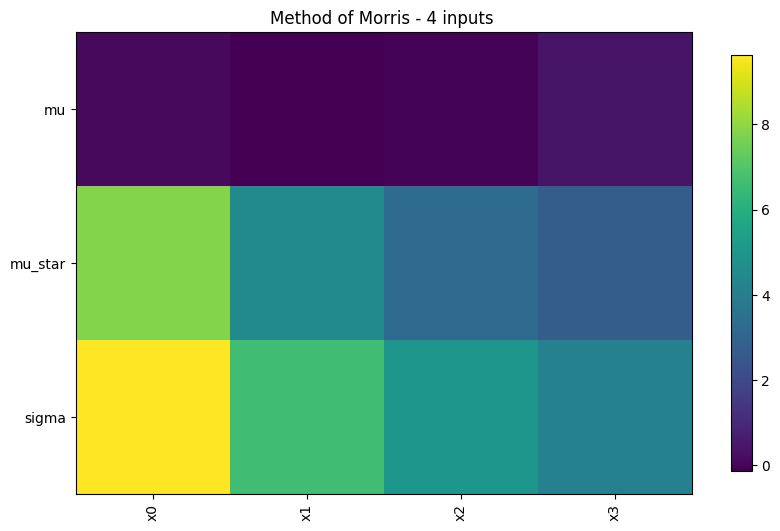

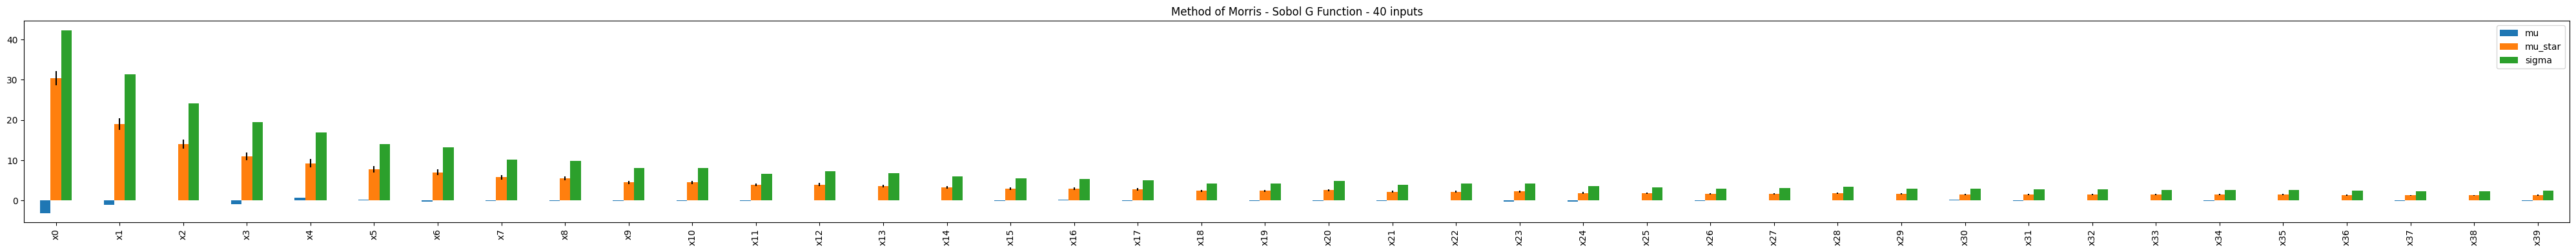

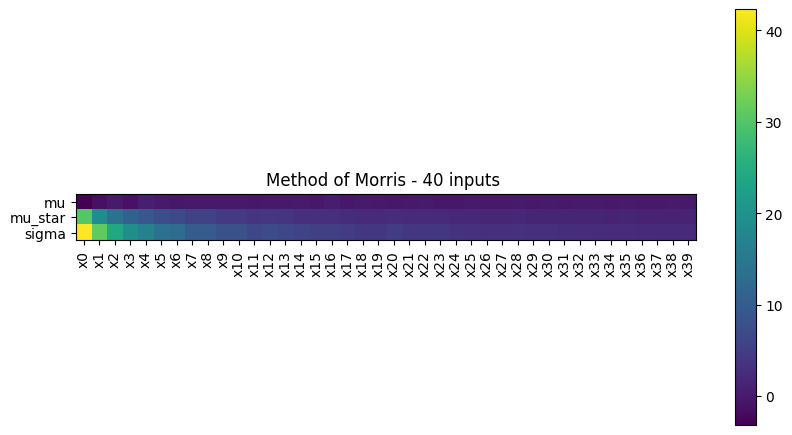

In [25]:
# ==== Method of Morris ~ Sobol G-Function ===
def morris_sobol_g(n: int, sp: ProblemSpec, a_arr: list, delta_arr: list):

    (sp.sample_morris(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_morris())
    
    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    # axes[0].set_yscale('log') # set plot to log scale
    # axes[1].set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Method of Morris - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap(title=f"Method of Morris - {n} inputs ")

morris_sobol_g(4, sp_4, a_arr_4, delta_arr_4)
morris_sobol_g(40, sp_40, a_arr_40, delta_arr_40)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


CPU times: user 1min 46s, sys: 4min 41s, total: 6min 28s
Wall time: 40.8 s


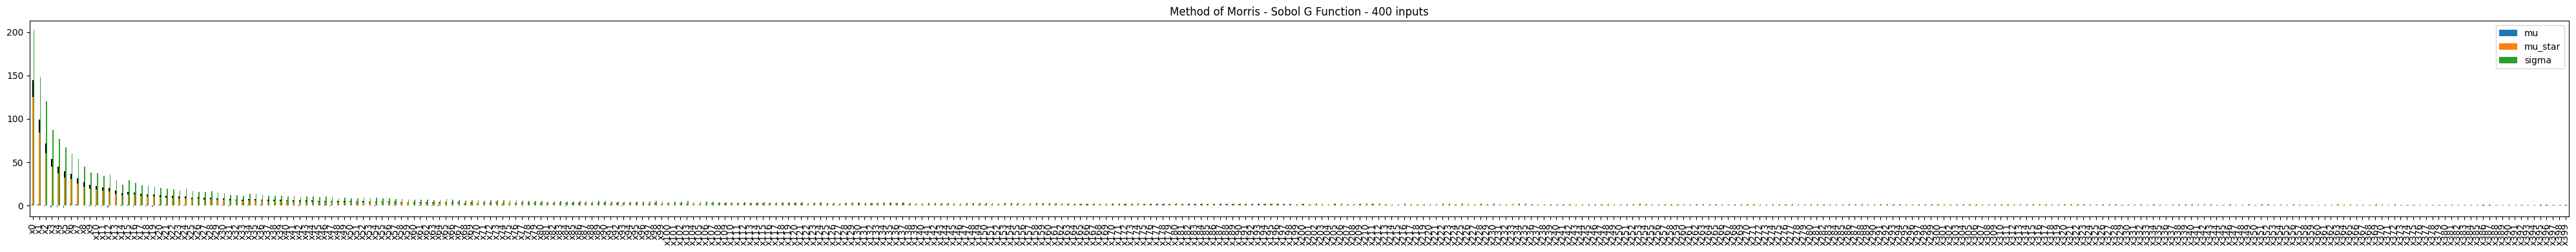

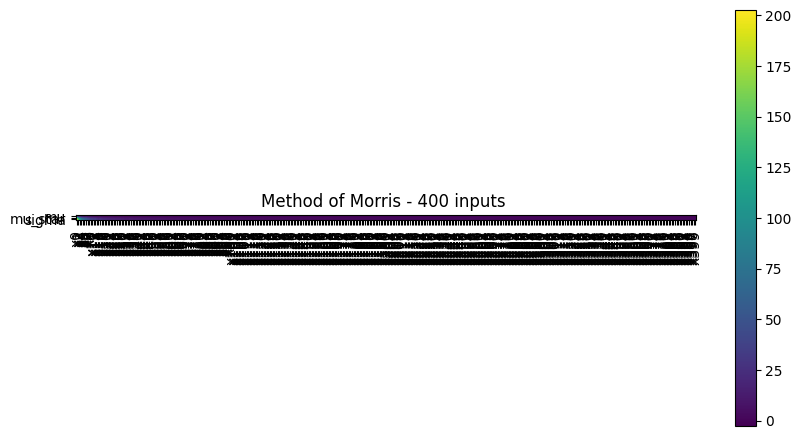

In [26]:
%%time
morris_sobol_g(400, sp_400, a_arr_400, delta_arr_400)